In [ ]:
# Mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install logomaker

In [ ]:
!pip install logomaker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 8.1 MB/s 


In [ ]:
# import required modules
import pandas as pd
import math
import logomaker
import matplotlib.pyplot as plt

# MakePWM

Background probabilities: 0.6
Pseudo-count: 0.25


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


-------------------------------------------------------------------------------------------------------------------
successfully generated two PWMs and their sequence logos. Please check the folder "/content/drive/MyDrive/BI/HW4/".

<OCT4_1_PWM>
             1         2         3         4         5         6         7  \
base                                                                         
A     0.501705  1.480550 -0.778233 -1.329330 -0.694895  1.560151  1.424529   
C    -0.196338 -1.627222 -8.296297 -1.792508  0.887117 -1.854288 -1.920137   
G    -0.325787 -8.296297 -1.545976  1.026270 -1.004868 -8.296297 -1.661664   
T     0.032395 -1.172624  1.440014 -1.205387 -1.172624 -5.251775 -1.080322   

             8         9        10  
base                                
A     0.593976  0.406712  0.471032  
C    -0.552305 -0.263288 -0.402352  
G    -0.237653 -0.417384 -0.363337  
T     0.133375  0.305421  0.301738  

<OCT4_2_PWM>
             1         2         3         4     

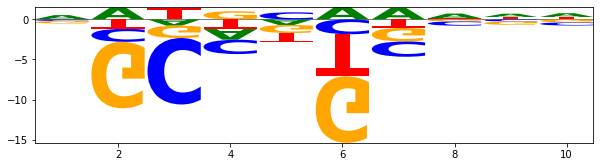

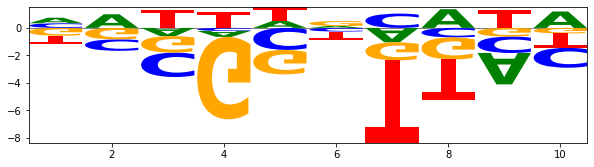

In [ ]:
def calculate_PWM(n, total, bg, k):
    f = (float(n) + bg*k)/(float(total) + k)
    W = math.log(f/bg)
    return W

def MakePWM(PSCM, bg, k):
    # convert PSCM to PWM
    total = PSCM.sum()[1] # total count

    for col in range(1,11):
        for index in 'ACGT':
            if index in 'GC':
                insert_bg = bg/2
            else:
                insert_bg = (1-bg)/2
            PSCM[col].loc[index] = calculate_PWM(PSCM[col].loc[index], total, insert_bg, k)
        
    PWM = PSCM

    return PWM
    
bg = float(input("Background probabilities: ")) # e.g. 0.6
k = float(input("Pseudo-count: ")) # e.g. 0.25

PSCM_data = pd.read_csv("/content/drive/MyDrive/BI/HW4/HW#4_PSCM_data.csv")
PSCM_data = PSCM_data.loc[[0,1,2,3,5,6,7,8]] # 필요한 행만 추출
PSCM_data.columns = ["base",1,2,3,4,5,6,7,8,9,10] # 컬럼명 변경
PSCM_data.set_index('base', inplace = True) # 1열을 인덱스로 변경
PSCM_data = PSCM_data.astype('float') # 전체를 float로 바꾸기

OCT4_1_PSCM = PSCM_data[:4] # OCT4_1에 해당하는 데이터만 추출
OCT4_2_PSCM = PSCM_data[4:] # OCT4_2에 해당하는 데이터만 추출

# Make PWM dataframe
OCT4_1_PWM = MakePWM(OCT4_1_PSCM, bg, k)
OCT4_2_PWM = MakePWM(OCT4_2_PSCM, bg, k)

OCT4_1_logo = logomaker.Logo(OCT4_1_PWM.transpose())
plt.savefig('/content/drive/MyDrive/BI/HW4/OCT4_1_logo.png') # save logo file
OCT4_2_logo = logomaker.Logo(OCT4_2_PWM.transpose())
plt.savefig('/content/drive/MyDrive/BI/HW4/OCT4_2_logo.png') # save logo file

print("-"*115)
print('successfully generated two PWMs and their sequence logos. Please check the folder "/content/drive/MyDrive/BI/HW4/".\n')
print("<OCT4_1_PWM>")
print(OCT4_1_PWM)
print("")
print("<OCT4_2_PWM>")
print(OCT4_2_PWM)
print("")
print("<OCT4_1_logo> & <OCT4_2_logo>")

# Change form
OCT4_1_PWM.reset_index(inplace = True) # 인덱스 리셋
OCT4_1_PWM.columns = ['> OCT4_1','','','','','','','','','',''] # 컬럼명 변경
OCT4_1_PWM.set_index('> OCT4_1', inplace = True) # 1열을 인덱스로 변경

OCT4_2_PWM.reset_index(inplace = True) # 인덱스 리셋
OCT4_2_PWM.columns = ['> OCT4_2','','','','','','','','','',''] # 컬럼명 변경
OCT4_2_PWM.set_index('> OCT4_2', inplace = True) # 1열을 인덱스로 변경

# Create csv file
OCT4_1_PWM.to_csv("/content/drive/MyDrive/BI/HW4/OCT4_1_PWM.csv")
OCT4_2_PWM.to_csv("/content/drive/MyDrive/BI/HW4/OCT4_2_PWM.csv")

# FindMotifs

In [ ]:
def FindMotifs(seq, PWM_name, t):
    TF_name = ''
    for ch in PWM_name:
        if ch != '_':
            TF_name += ch
        else:
            break
    sum_dict = {}
    if PWM_name == 'OCT4_1':
        OCT4_1_PWM = pd.read_csv("/content/drive/MyDrive/BI/HW4/OCT4_1_PWM.csv") # read csv 
        OCT4_1_PWM.columns = ["base",1,2,3,4,5,6,7,8,9,10] # 컬럼명 변경
        OCT4_1_PWM.set_index('base', inplace = True) # 1열을 인덱스로 변경

        start = 0
        end = len(OCT4_1_PWM.T)
        while True:
            length = len(seq[start:end])
            if length < 10:
                break
            else:
                count = 1
                sum = 0
                for base in seq[start:end]:
                    sum += OCT4_1_PWM.loc[base][count]
                    count += 1
                
                if sum >= t:
                    sum_dict[sum] = [start, end] 
            start += 1
            end += 1

    elif PWM_name == 'OCT4_2':
        OCT4_2_PWM = pd.read_csv("/content/drive/MyDrive/BI/HW4/OCT4_2_PWM.csv") # read csv 
        OCT4_2_PWM.columns = ["base",1,2,3,4,5,6,7,8,9,10] # 컬럼명 변경
        OCT4_2_PWM.set_index('base', inplace = True) # 1열을 인덱스로 변경

        start = 0
        end = len(OCT4_2_PWM.T)
        while True:
            length = len(seq[start:end])
            if length < 10:
                break
            else:
                count = 1
                sum = 0
                for base in seq[start:end]:
                    sum += OCT4_2_PWM.loc[base][count]
                    count += 1
                
                if sum >= t:
                    sum_dict[sum] = [start, end] 
            start += 1
            end += 1

    num_sites = len(sum_dict)
    highest_PWM = max(list(sum_dict.keys()))
    site_range = sum_dict[highest_PWM]
    hightest_site = seq[site_range[0]:site_range[1]]

    print("TF name:", TF_name)
    print("Position weight matrix name:", PWM_name)
    print("Threshold:", t)
    print("No.sites:", num_sites)
    print("Highest PWM score:", highest_PWM)
    print("Highest score binding site:", hightest_site)

    print('')
    for i in range(num_sites):
        PWM = list(sum_dict.keys())[i]
        site_range = sum_dict[PWM]

        print(f'{i+1:>2d}: {seq[site_range[0]:site_range[1]]} | {site_range[0]:>3d},{site_range[1]:>3d} | {PWM}')

In [ ]:
with open("/content/drive/MyDrive/BI/HW4/enhancer.txt", 'r') as f:
    seq = f.readlines()
seq = seq[1]

PWM_name = input("PWM name: ") # e.g. OCT4_1
threshold = float(input("Threshold: ")) # e.g. 0.5
FindMotifs(seq, PWM_name, threshold)

PWM name: OCT4_1
Threshold: 0.5
TF name: OCT4
Position weight matrix name: OCT4_1
Threshold: 0.5
No.sites: 18
Highest PWM score: 5.785161945274882
Highest score binding site: CATGGAACTT

 1: TATTAACATA |   5, 15 | 2.0631193803418943
 2: TATTAACATG |  29, 39 | 1.228750437261262
 3: CATGGAACTT |  35, 45 | 5.785161945274882
 4: ACTCCAACAA |  45, 55 | 2.7192240408496584
 5: AATACAGATG |  53, 63 | 3.4146024287596597
 6: GCTGAATAAA |  62, 72 | 1.769928253010461
 7: GAATAAATGT |  65, 75 | 1.478657322336613
 8: AATAAATGTA |  66, 76 | 2.416671790012249
 9: AATGTAGTCT |  70, 80 | 3.346227382528803
10: AAGTGAAGGA |  80, 90 | 1.0266976616983046
11: GAAGGAAGAA |  84, 94 | 4.022701954841729
12: AAGGAAGAAG |  85, 95 | 1.3034916463496269
13: GAAGAAGGAA |  88, 98 | 1.2464825922704352
14: GAAGGAAAGG |  91,101 | 3.19586641375841
15: AAGGAAAGGT |  92,102 | 3.3990347486319865
16: GCTGCCATCA | 106,116 | 1.311752788838674
17: GAATAAAGAC | 151,161 | 1.2276337248084257
18: AATAAAGACA | 152,162 | 2.098250624497

In [ ]:
with open("/content/drive/MyDrive/BI/HW4/enhancer.txt", 'r') as f:
    seq = f.readlines()
seq = seq[1]

PWM_name = input("PWM name: ") # e.g. OCT4_1
threshold = float(input("Threshold: ")) # e.g. 0.5
FindMotifs(seq, PWM_name, threshold)

PWM name: OCT4_2
Threshold: 0.5
TF name: OCT4
Position weight matrix name: OCT4_2
Threshold: 0.5
No.sites: 9
Highest PWM score: 8.384792319159239
Highest score binding site: TATTAACATA

 1: TATTAACATA |   5, 15 | 8.384792319159239
 2: CATATCCTCA |  11, 21 | 1.0654067316345555
 3: AGTATTAACA |  27, 37 | 1.2022728614250635
 4: TATTAACATG |  29, 39 | 6.788390439915565
 5: ACAATACAGA |  51, 61 | 2.6785664582156468
 6: AATACAGATG |  53, 63 | 1.7596177078332969
 7: ATGCTGAATA |  60, 70 | 3.170222655601447
 8: ACTCAGAATT | 115,125 | 2.0897196923637806
 9: AATAAAGACA | 152,162 | 2.9642384061022593
